In [10]:
import numpy as np
import sklearn as sk

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
import cv2 as cv
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop



In [11]:
size=128 #taille des images
nbDir=52 #nombre de fichiers de fleurs

In [12]:
data=[]
label=[]
FlowerPath='../echantillon'


os.listdir(FlowerPath)
for folder in os.listdir(FlowerPath): #parcours des dossier dans le dossier des fleurs
    for file in os.listdir(os.path.join(FlowerPath,folder)): #parcours des fichiers (images)
        if  file.endswith("jpeg"):
            label.append(folder)
            img = cv.imread(os.path.join(FlowerPath,folder, file))
            img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            im = cv.resize(img_rgb, (size,size))
            data.append(im)
                    
        else: 
            continue

data_arr = np.array(data)
label_arr = np.array(label)
y = LabelEncoder().fit_transform(label_arr)
y = to_categorical(y,nbDir) #mettre le nb de fichiers de fleurs
X = data_arr/255

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [14]:
new_model = tf.keras.models.load_model('modele/my_model')
new_model.summary()
new_model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                    

C:\Users\Hugo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

In [16]:
batch_size=32
epochs=20

checkpoint_path = "modele/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history = new_model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,y_test),   
                              verbose = 1,
                              callbacks=[cp_callback])

C:\Users\Hugo\AppData\Local\Temp/ipykernel_14096/3478956413.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = new_model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),


Epoch 1/20
180/180 [==============================] - ETA: 0s - loss: 1.4760 - accuracy: 0.5742
Epoch 00001: saving model to modele\cp.ckpt
180/180 [==============================] - 360s 2s/step - loss: 1.4760 - accuracy: 0.5742 - val_loss: 1.5231 - val_accuracy: 0.5764
Epoch 2/20
180/180 [==============================] - ETA: 0s - loss: 1.4382 - accuracy: 0.5807
Epoch 00002: saving model to modele\cp.ckpt
180/180 [==============================] - 382s 2s/step - loss: 1.4382 - accuracy: 0.5807 - val_loss: 1.4784 - val_accuracy: 0.5973
Epoch 3/20
180/180 [==============================] - ETA: 0s - loss: 1.4717 - accuracy: 0.5683
Epoch 00003: saving model to modele\cp.ckpt
180/180 [==============================] - 379s 2s/step - loss: 1.4717 - accuracy: 0.5683 - val_loss: 1.5169 - val_accuracy: 0.5827
Epoch 4/20
180/180 [==============================] - ETA: 0s - loss: 1.4690 - accuracy: 0.5730
Epoch 00004: saving model to modele\cp.ckpt
180/180 [==============================] - 3

KeyboardInterrupt: 

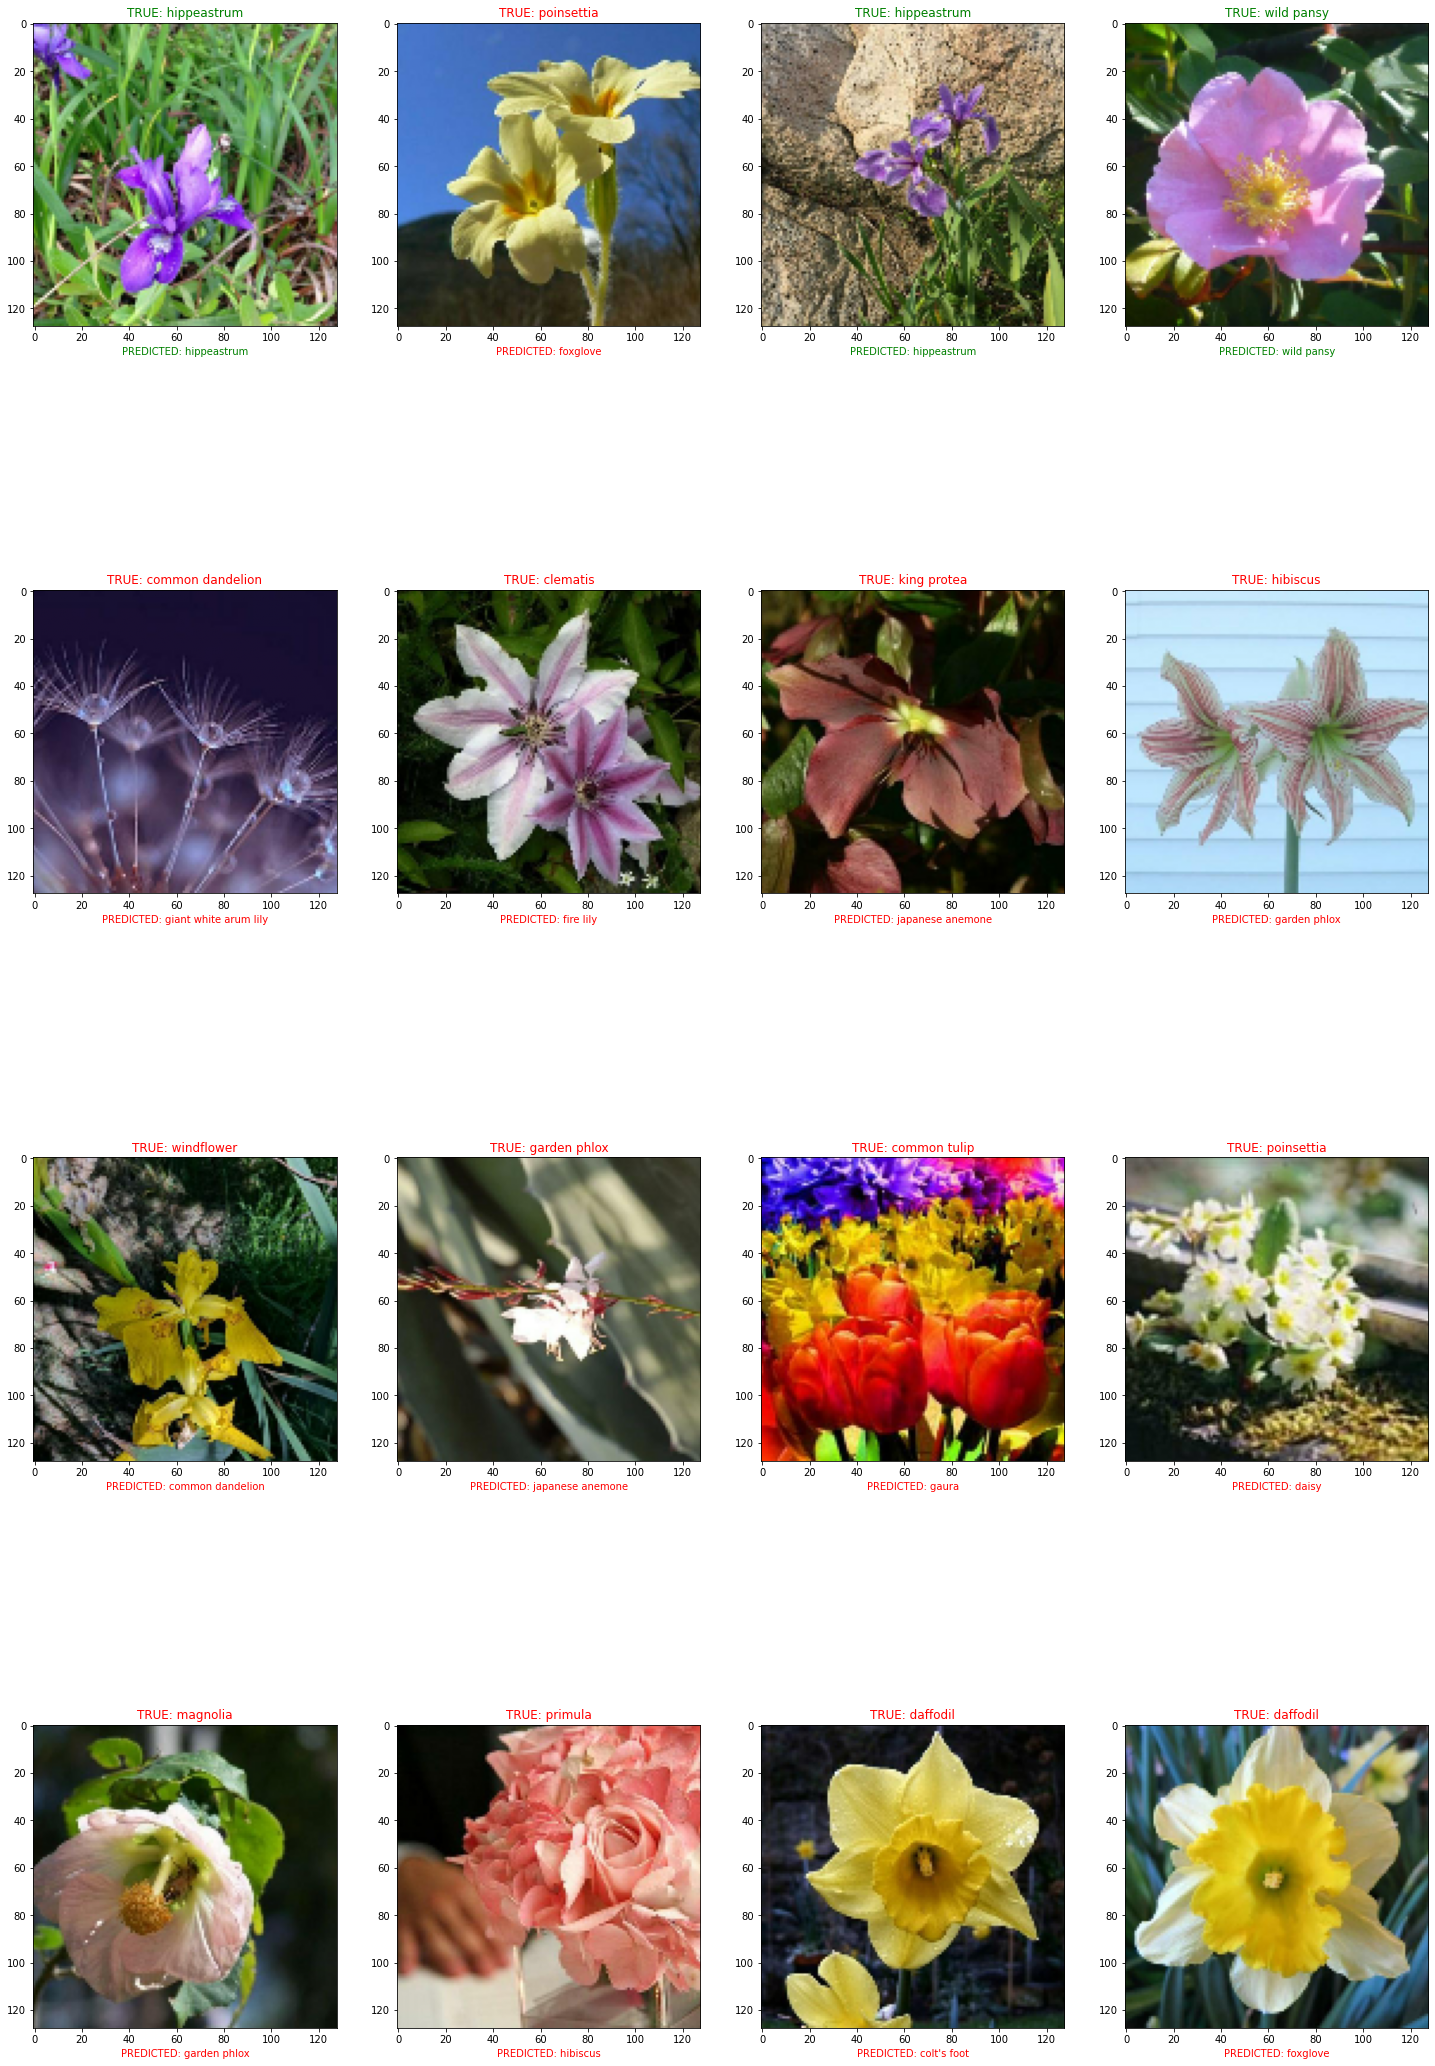

In [ ]:
categories = np.sort(os.listdir(FlowerPath))
fig, ax = plt.subplots(4,4, figsize=(25, 40))

for i in range(4):
    for j in range(4):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(new_model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(new_model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(size, size, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(new_model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(size, size, 3), cmap='gray')

In [ ]:
new_model.save('modele/my_model')
del new_model

INFO:tensorflow:Assets written to: modele/my_model\assets
